
Tree height: 28.071359
Tree length: 481.049928
strictly bifurcating tree
annotations present

Numbers of objects in tree: 903 (451 nodes and 452 leaves)



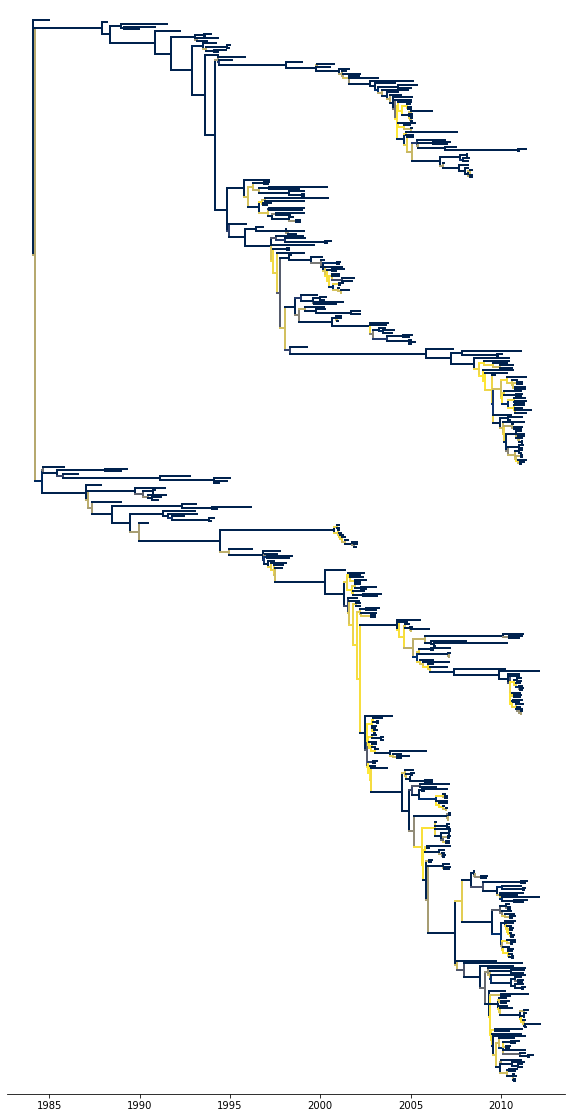

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt

import requests
from io import StringIO as sio

import baltic as bt

address='https://raw.githubusercontent.com/evogytis/fluB/master/data/mcc%20trees/InfB_PB1t_ALLs1.mcc.tre' ## address of example tree
fetch_tree = requests.get(address) ## fetch tree
treeFile=sio(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree

fig,ax = plt.subplots(figsize=(10,20),facecolor='w')

cmap=mpl.cm.cividis_r ## colour map

x_attr=lambda k: k.absoluteTime
c_func=lambda k: cmap(k.traits['posterior']) if k.is_node() else cmap(1.0) ## colour branches based on posterior probability

ll.plotTree(ax,x_attr=x_attr,colour=c_func) ## tree
ax.plot() ## need to call plot when only drawing the tree to force drawing of line collections

ax.set_ylim(-5,ll.ySpan+5)

ax.set_yticks([])
ax.set_yticklabels([])
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
plt.show()

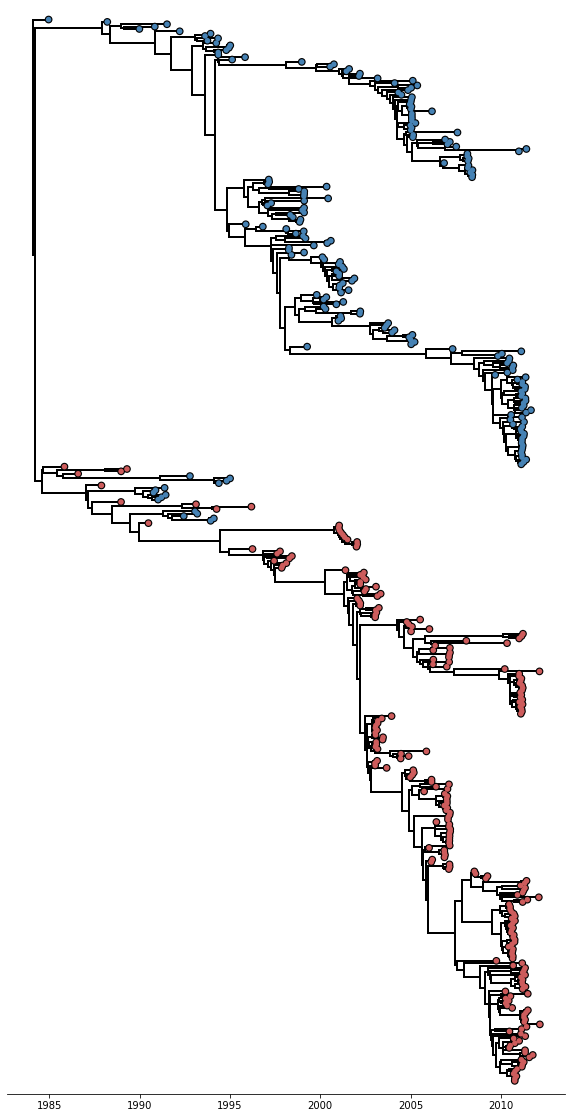

In [2]:
fig,ax = plt.subplots(figsize=(10,20),facecolor='w')

cmap=mpl.cm.cividis_r

x_attr=lambda k: k.absoluteTime
c_func=lambda k: 'indianred' if k.traits['HA']=='V' else 'steelblue' ## colour red if HA is Victoria, blue otherwise

ll.plotTree(ax,x_attr=x_attr,colour='k') ## tree
ll.plotPoints(ax,x_attr=x_attr,size=30,colour=c_func,zorder=100) ## tips

ax.set_ylim(-5,ll.ySpan+5)

ax.set_yticks([])
ax.set_yticklabels([])
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
plt.show()